In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

print(pd.DataFrame(X))
print(pd.Series(y))

           0         1         2         3         4         5         6   \
0   -0.258203  1.019808  1.524563  0.617243  0.148243  0.744111 -0.363963   
1   -0.458166  0.828728 -0.656965 -0.056297  0.254895 -0.018241  0.313829   
2   -0.387378  0.761818 -1.310351 -0.351663 -0.130643 -0.641420  0.152001   
3   -2.394585 -0.036724  1.361228 -0.371470  1.871835 -1.226815  0.770733   
4    0.258229 -1.600952  1.101282  1.659578  0.927923 -0.093182 -1.778309   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.724879  0.281545 -0.362035 -2.602418  0.699501 -0.328376  0.383521   
996  2.085897  0.461640  0.372497 -1.838814  0.024923 -0.710831 -0.945424   
997 -0.547793 -0.674539 -0.834644  1.050191 -0.797763  0.699879 -0.943583   
998  0.559619 -0.625025  1.404538  0.593826 -0.270234 -0.519678 -1.407141   
999 -1.424876  0.527146  0.157864 -0.926648 -0.801353  1.825411  0.999557   

           7         8         9         10        11        12        13  

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Logistic regression
model1 = LogisticRegression()
# KNN
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

#predict probabilities
pred_prob1 = model1.predict(X_test)
pred_prob2 = model2.predict(X_test)

In [3]:
pred_prob1

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [4]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [5]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1)
auc_score2 = roc_auc_score(y_test, pred_prob2)

print(auc_score1, auc_score2)

0.9479913916786227 0.863522238163558


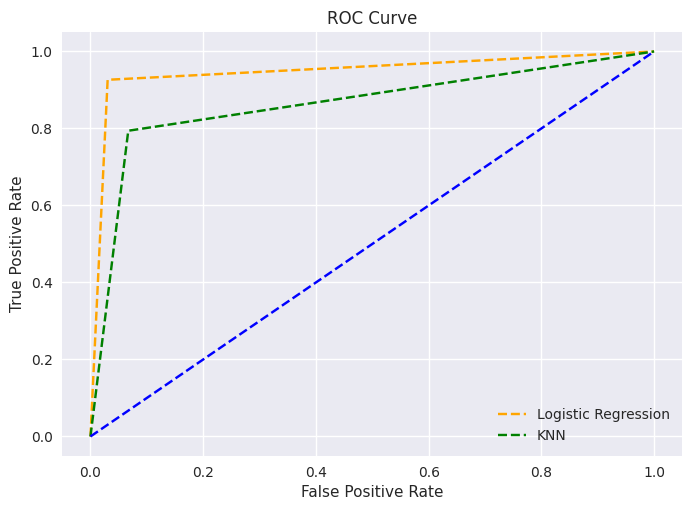

In [10]:
#matplotlib
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

# plot the roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

#title
plt.title('ROC Curve')
# x title
plt.xlabel('False Positive Rate')
# y title
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()